In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import os

In [3]:
RQ_FILE = "oldRQTimelevelShiftingOn.csv"
VA_FILE = "oldRQTime.csv"
WORKLOAD_NAME = "-I 1000 -U 1500 -D 500 -S 50 -Y 0.6"

In [52]:
workload_name = input("Pleae Enter the Workload Name: ")
if workload_name.strip() == '':
    raise Exception("Invalid Workload Name")
else:
    WORKLOAD_NAME = workload_name

EXP_DATA = "exp_data"
CURR_DIR = Path(os.getcwd())

# Create directories if not exists
EXP_PATH = CURR_DIR.joinpath(EXP_DATA)

if not EXP_PATH.exists():
    EXP_PATH.mkdir()

WORKLOAD_PATH = EXP_PATH.joinpath(WORKLOAD_NAME)

if not WORKLOAD_PATH.exists():
    WORKLOAD_PATH.mkdir()

In [4]:
column_names = [
    "Query Number",
    "Query Type", 
    "Key", 
    "Total number of Compaction", 
    "Total number of Files written while Compaction", 
    "Total number of Pages written while Compaction", 
    "Total number of Entries written while Compaction", 
    "Number of Trivial File Moves", 
    "Number of Buffer Flush", 
    "Number of Pages Flushed from Buffer", 
    "Number of Trivial File moves from Buffer", 
    "Total number of Entries Written while Buffer Flush", 
    "Number of Files Written during Range Query", 
    "Number of Pages written during Range Query", 
    "Number of Entries written during Range Query", 
    "Total Vanilla Compaction", 
    "Total RQDC Compaction", 
    "Entries count before Query", 
    "Entries count after Query", 
    "Time Taken"
]

rqdc_df = pd.read_csv(RQ_FILE, names=column_names)
vanilla_df = pd.read_csv(VA_FILE, names=column_names)


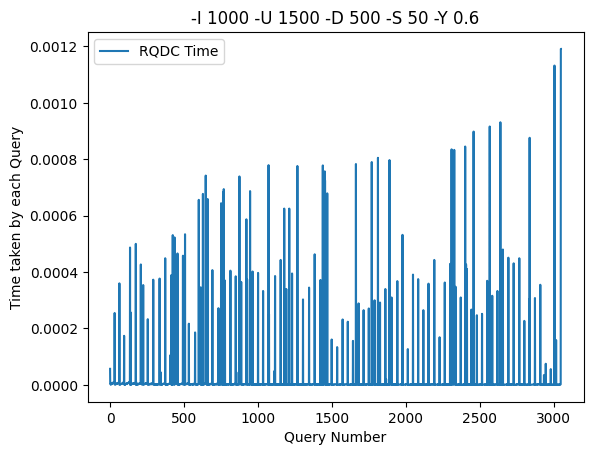

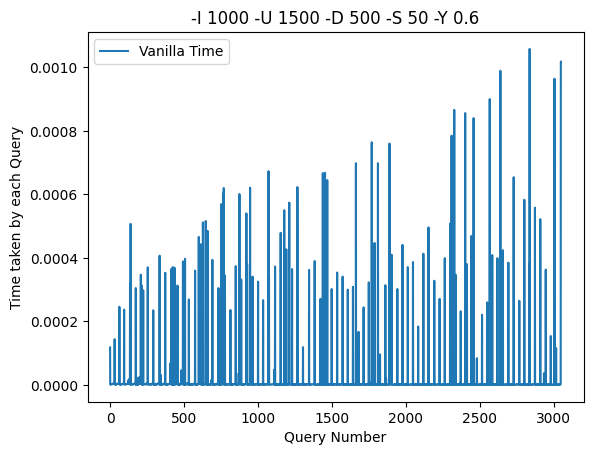

In [5]:
# Time Taken by each query for both Vanilla and RQDC
query_compare_df = pd.merge(rqdc_df[["Query Number", "Time Taken"]], vanilla_df[["Query Number", "Time Taken"]], on="Query Number")
query_compare_df = query_compare_df.rename(columns={"Time Taken_x": "RQDC Time", "Time Taken_y": "Vanilla Time"})

query_compare_df.plot(x="Query Number", y=["RQDC Time"])
plt.xlabel("Query Number")
plt.ylabel("Time taken by each Query")
plt.title(WORKLOAD_NAME)
plt.show()

query_compare_df.plot(x="Query Number", y=["Vanilla Time"])
plt.xlabel("Query Number")
plt.ylabel("Time taken by each Query")
plt.title(WORKLOAD_NAME)
plt.show()

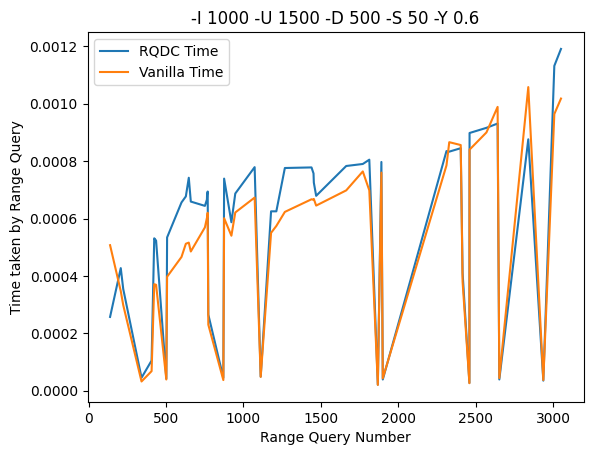

In [6]:
# Time Taken by each range query for both Vanilla and RQDC
range_query_only_rqdc_df = rqdc_df[rqdc_df["Query Type"] == " Range"]
range_query_only_vanilla_df = vanilla_df[vanilla_df["Query Type"] == " Range"]

range_query_compare_df = pd.merge(range_query_only_rqdc_df[["Query Number", "Time Taken"]], range_query_only_vanilla_df[["Query Number", "Time Taken"]], on="Query Number")
range_query_compare_df = range_query_compare_df.rename(columns={"Time Taken_x": "RQDC Time", "Time Taken_y": "Vanilla Time"})

range_query_compare_df.plot(x="Query Number", y=["RQDC Time", "Vanilla Time"])
plt.xlabel("Range Query Number")
plt.ylabel("Time taken by Range Query")
plt.title(WORKLOAD_NAME)
plt.show()


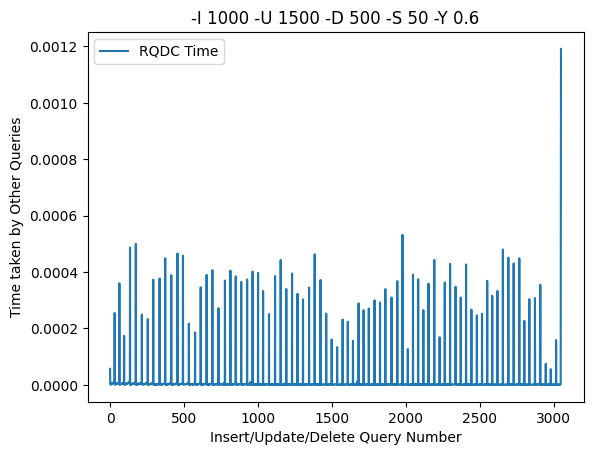

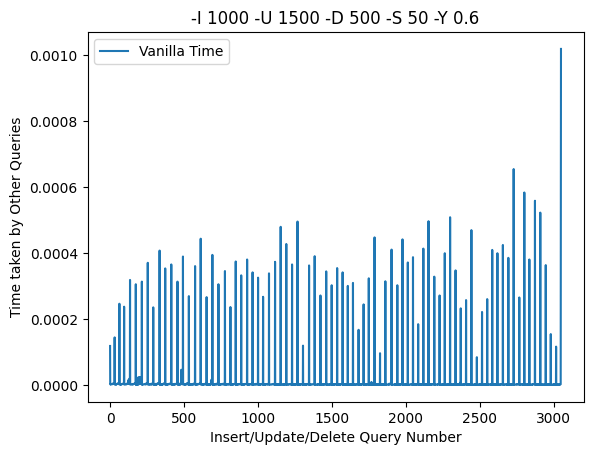

In [7]:
# Time Taken by other queries for both Vanilla and RQDC
other_query_only_rqdc_df = rqdc_df[rqdc_df["Query Type"] != " Range"]
other_query_only_vanilla_df = vanilla_df[vanilla_df["Query Type"] != " Range"]

other_query_compare_df = pd.merge(other_query_only_rqdc_df[["Query Number", "Time Taken"]], other_query_only_vanilla_df[["Query Number", "Time Taken"]], on="Query Number")
other_query_compare_df = other_query_compare_df.rename(columns={"Time Taken_x": "RQDC Time", "Time Taken_y": "Vanilla Time"})

# sample_size = 10000
# other_query_compare_df = other_query_compare_df.sample(n=sample_size)
# other_query_compare_df = other_query_compare_df.sort_values(by="Query Number")

other_query_compare_df.plot(x="Query Number", y=["RQDC Time"])
plt.xlabel("Insert/Update/Delete Query Number")
plt.ylabel("Time taken by Other Queries")
plt.title(WORKLOAD_NAME)

other_query_compare_df.plot(x="Query Number", y=["Vanilla Time"])
plt.xlabel("Insert/Update/Delete Query Number")
plt.ylabel("Time taken by Other Queries")
plt.title(WORKLOAD_NAME)
plt.show()

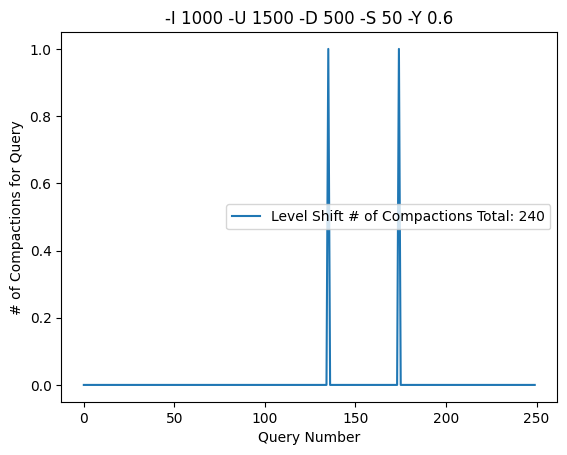

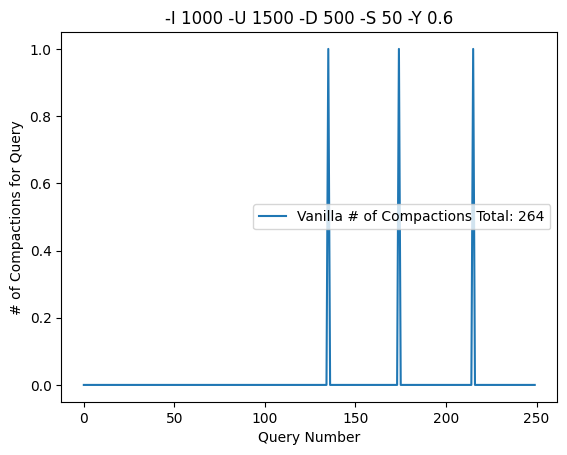

In [24]:
# Number of Compactions for both Vanilla and RQDC
num_compactions_compare_df = pd.merge(rqdc_df[["Query Number", "Total number of Compaction"]], vanilla_df[["Query Number", "Total number of Compaction"]], on="Query Number")
num_compactions_compare_df = num_compactions_compare_df.rename(columns={"Total number of Compaction_x": "Level Shift # of Compactions", "Total number of Compaction_y": "Vanilla # of Compactions"})

num_compactions_compare_df.head(250).plot(x="Query Number", y=["Level Shift # of Compactions"])
plt.xlabel("Query Number")
plt.ylabel("# of Compactions for Query")
plt.title(WORKLOAD_NAME)

# Calculating and displaying the total
total_compactions = sum(num_compactions_compare_df["Level Shift # of Compactions"])
plt.legend([f"Level Shift # of Compactions Total: {total_compactions}"])
plt.show()

num_compactions_compare_df.head(250).plot(x="Query Number", y=["Vanilla # of Compactions"])
plt.xlabel("Query Number")
plt.ylabel("# of Compactions for Query")
plt.title(WORKLOAD_NAME)

# Calculating and displaying the total
total_compactions = sum(num_compactions_compare_df["Vanilla # of Compactions"])
plt.legend([f"Vanilla # of Compactions Total: {total_compactions}"])
plt.show()


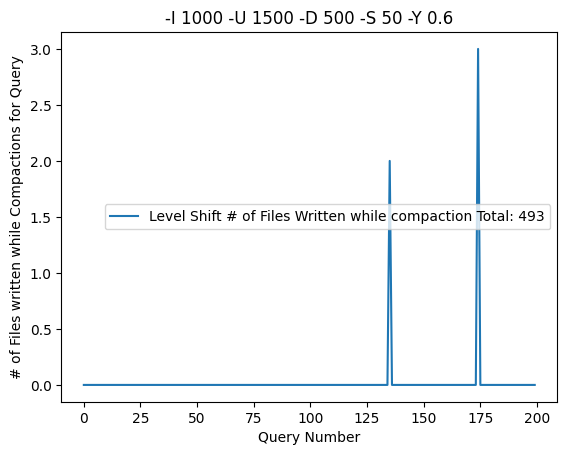

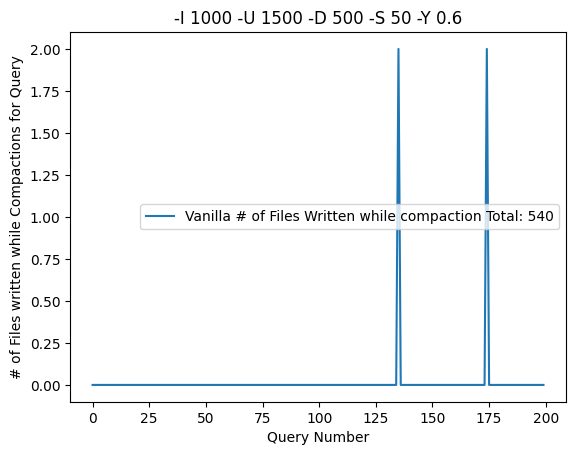

RQDC # of Compaction 493
Vanilla # of Compaction 540


In [22]:
# Number of Files written while Compactions for both Vanilla and RQDC
num_compactions_compare_df = pd.merge(rqdc_df[["Query Number", "Total number of Files written while Compaction"]], vanilla_df[["Query Number", "Total number of Files written while Compaction"]], on="Query Number")
num_compactions_compare_df = num_compactions_compare_df.rename(columns={"Total number of Files written while Compaction_x": "RQDC # of Files written while Compactions", "Total number of Files written while Compaction_y": "Vanilla # of Files written while Compactions"})

num_compactions_compare_df.plot(x="Query Number", y=["RQDC # of Files written while Compactions"])
plt.xlabel("Query Number")
plt.ylabel("# of Files written while Compactions for Query")
plt.title(WORKLOAD_NAME)

# Calculating and displaying the total
total_compactions = sum(num_compactions_compare_df["RQDC # of Files written while Compactions"])
plt.legend([f"Level Shift # of Files Written while compaction Total: {total_compactions}"])
plt.show()

num_compactions_compare_df.plot(x="Query Number", y=["Vanilla # of Files written while Compactions"])
plt.xlabel("Query Number")
plt.ylabel("# of Files written while Compactions for Query")
plt.title(WORKLOAD_NAME)

# Calculating and displaying the total
total_compactions = sum(num_compactions_compare_df["Vanilla # of Files written while Compactions"])
plt.legend([f"Vanilla # of Files Written while compaction Total: {total_compactions}"])
plt.show()

print("RQDC # of Compaction", sum(num_compactions_compare_df["RQDC # of Files written while Compactions"]))
print("Vanilla # of Compaction", sum(num_compactions_compare_df["Vanilla # of Files written while Compactions"]))

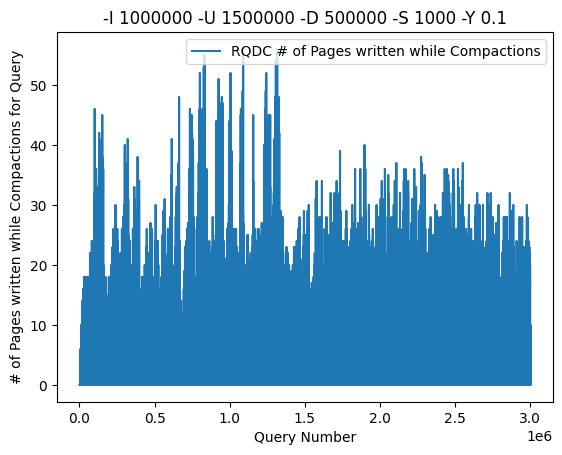

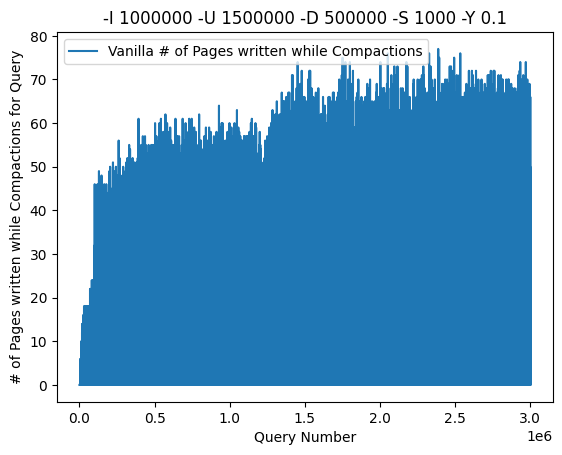

In [60]:
# Number of Files written while Compactions for both Vanilla and RQDC
num_compactions_compare_df = pd.merge(rqdc_df[["Query Number", "Total number of Pages written while Compaction"]], vanilla_df[["Query Number", "Total number of Pages written while Compaction"]], on="Query Number")
num_compactions_compare_df = num_compactions_compare_df.rename(columns={"Total number of Pages written while Compaction_x": "RQDC # of Pages written while Compactions", "Total number of Pages written while Compaction_y": "Vanilla # of Pages written while Compactions"})

num_compactions_compare_df.plot(x="Query Number", y=["RQDC # of Pages written while Compactions"])
plt.xlabel("Query Number")
plt.ylabel("# of Pages written while Compactions for Query")
plt.title(WORKLOAD_NAME)

num_compactions_compare_df.plot(x="Query Number", y=["Vanilla # of Pages written while Compactions"])
plt.xlabel("Query Number")
plt.ylabel("# of Pages written while Compactions for Query")
plt.title(WORKLOAD_NAME)
plt.show()

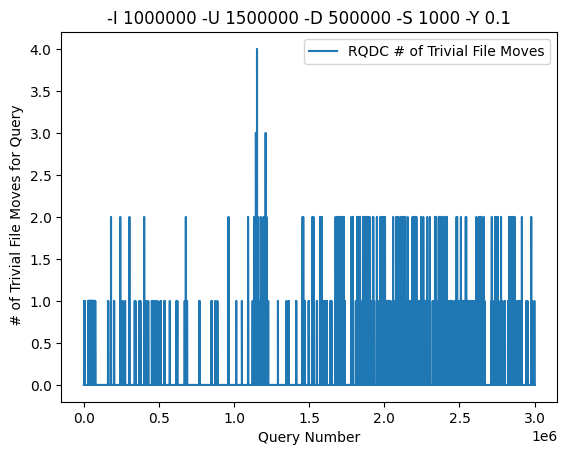

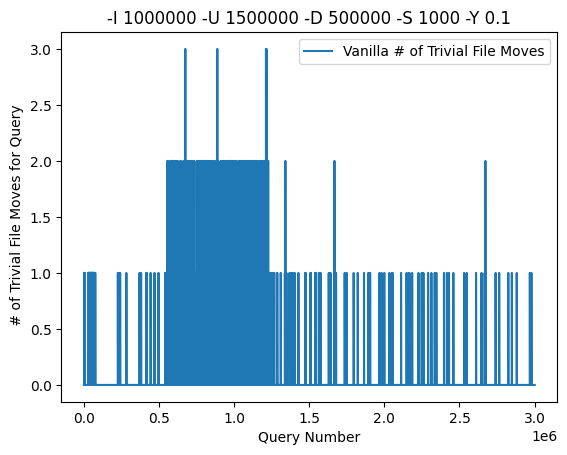

In [30]:
# Number of Files written while Compactions for both Vanilla and RQDC
num_compactions_compare_df = pd.merge(rqdc_df[["Query Number", "Number of Trivial File Moves"]], vanilla_df[["Query Number", "Number of Trivial File Moves"]], on="Query Number")
num_compactions_compare_df = num_compactions_compare_df.rename(columns={"Number of Trivial File Moves_x": "RQDC # of Trivial File Moves", "Number of Trivial File Moves_y": "Vanilla # of Trivial File Moves"})

num_compactions_compare_df.plot(x="Query Number", y=["RQDC # of Trivial File Moves"])
plt.xlabel("Query Number")
plt.ylabel(" # of Trivial File Moves for Query")
plt.title(WORKLOAD_NAME)

num_compactions_compare_df.plot(x="Query Number", y=["Vanilla # of Trivial File Moves"])
plt.xlabel("Query Number")
plt.ylabel(" # of Trivial File Moves for Query")
plt.title(WORKLOAD_NAME)
plt.show()

Text(0.5, 1.0, '')

<Figure size 5000x2500 with 0 Axes>

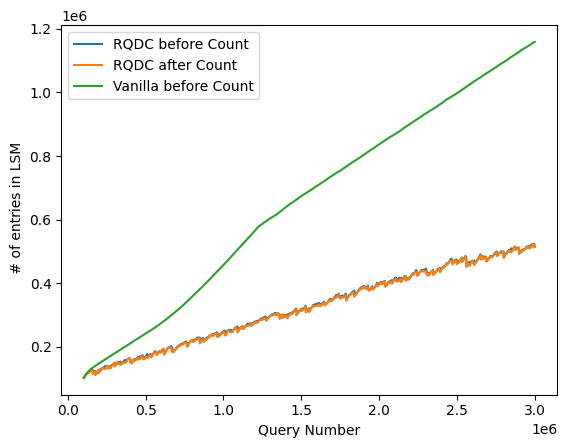

In [17]:
# Entries before and after each range query for both Vanilla and RQDC
range_query_only_rqdc_df = rqdc_df[rqdc_df["Query Type"] == " Range"]
range_query_only_vanilla_df = vanilla_df[vanilla_df["Query Type"] == " Range"]

entries_compare_df = pd.merge(range_query_only_rqdc_df[["Query Number", "Entries count before Query", "Entries count after Query"]], range_query_only_vanilla_df[["Query Number", "Entries count before Query", "Entries count after Query"]], on="Query Number")
entries_compare_df = entries_compare_df.rename(columns={"Entries count before Query_x": "RQDC before Count", "Entries count after Query_x": "RQDC after Count", "Entries count before Query_y": "Vanilla before Count", "Entries count after Query_y": "Vanilla after Count"})

entries_compare_df.plot(x="Query Number", y=["RQDC before Count", "RQDC after Count", "Vanilla before Count"])
plt.xlabel("Query Number")
plt.ylabel(" # of entries in LSM")
plt.title(WORKLOAD_NAME)


RQDC # of Compaction while Range Query 168499


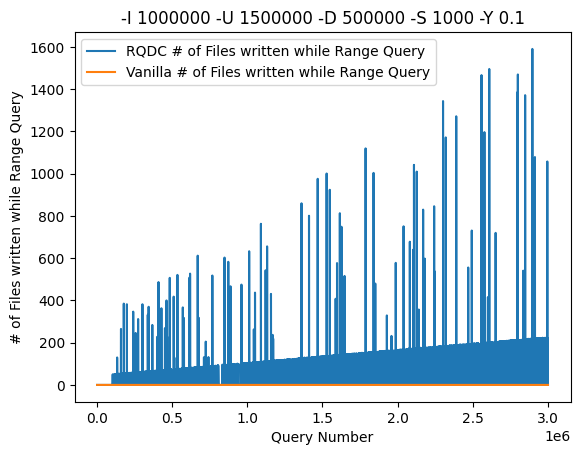

In [59]:
# Number of Files written while Compactions for both Vanilla and RQDC
num_compactions_compare_df = pd.merge(rqdc_df[["Query Number", "Number of Files Written during Range Query"]], vanilla_df[["Query Number", "Number of Files Written during Range Query"]], on="Query Number")
num_compactions_compare_df = num_compactions_compare_df.rename(columns={"Number of Files Written during Range Query_x": "RQDC # of Files written while Range Query", "Number of Files Written during Range Query_y": "Vanilla # of Files written while Range Query"})

num_compactions_compare_df.plot(x="Query Number", y=["RQDC # of Files written while Range Query", "Vanilla # of Files written while Range Query"])
plt.xlabel("Query Number")
plt.ylabel("# of Files written while Range Query")
plt.title(WORKLOAD_NAME)

print("RQDC # of Compaction while Range Query", sum(num_compactions_compare_df["RQDC # of Files written while Range Query"]))

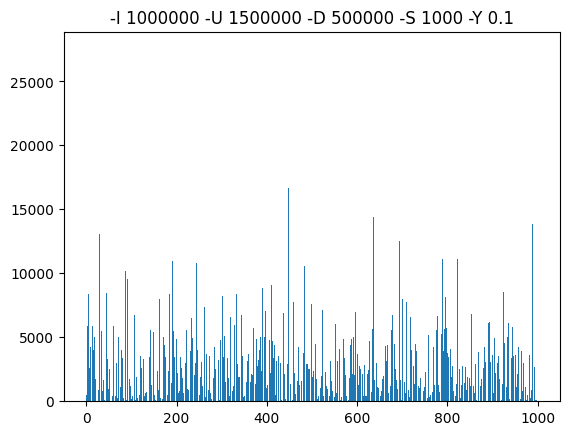

In [47]:
difference = list()
last = None

def get_line(f):
    while line:=f.readline():
        yield line

f = open('workload.txt', 'r')

for index, line in enumerate(get_line(f), 1):
    if line.startswith('S '):
        if last == None:
            last = index
        else:
            difference.append(index - last)
            last = index

x = range(len(difference))
plt.bar(x, difference)
plt.title(WORKLOAD_NAME)
plt.savefig(f"{EXP_DATA}/{WORKLOAD_NAME}/{WORKLOAD_NAME} rqintervals.png")
plt.show()

In [26]:
## Move files to the right folder
new_rq_time_csv = CURR_DIR.joinpath("newRQTime.csv")
old_rq_time_csv = CURR_DIR.joinpath("oldRQTime.csv")
rc_on_log = CURR_DIR.joinpath(f"{WORKLOAD_NAME} --RC-ON.log")
rc_off_log = CURR_DIR.joinpath(f"{WORKLOAD_NAME} --RC-OFF.log")

workload_file = CURR_DIR.joinpath("workload.txt")

def shift_file(f: Path):
    if f.exists():
        f.rename(CURR_DIR / EXP_DATA / WORKLOAD_NAME / f.name)

# def remove_workload(f: Path):
#     if f.exists():
#         f.unlink()

shift_file(new_rq_time_csv)
shift_file(old_rq_time_csv)
shift_file(rc_on_log)
shift_file(rc_off_log)
shift_file(workload_file)
